<h1>
    <center>Multi-Theme Hackathon - Climate Change Challenges </center>
    <h2>
        <center>Artificial intelligence theme.</center>
    </h2>
</h1>

<h3>- Our solution is An Intelligence solution to predict whether it will rain or dry in Cairo/Egypt.</h3>

In [ ]:
#Importing libs
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [ ]:
#load our data
data1 = pd.read_csv("/content/drive/MyDrive/Helwan-hack-data/Data1.csv")
data2 = pd.read_csv("/content/drive/MyDrive/Helwan-hack-data/Data2.csv")

<h3>Exploring our data</h3

In [ ]:
data1.head()

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
0,1990,1,1,98.00,2.74,3.48,2.20,1.29,110.12,3.90,5.17,2.95,2.23,110.69
1,1990,1,2,97.84,3.95,5.38,3.16,2.21,257.62,6.34,7.85,4.21,3.64,257.75
2,1990,1,3,97.98,4.71,6.84,3.42,3.41,287.00,7.41,9.43,5.44,3.98,287.38
3,1990,1,4,98.36,4.02,6.16,1.82,4.34,303.38,5.88,8.83,2.58,6.25,303.75
4,1990,1,5,98.47,1.63,2.12,0.83,1.30,120.31,2.12,3.08,1.15,1.93,120.38


In [ ]:
data2.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
0,1990,1,1,13.92,1.54,7.73,12.90,13.58,21.58,8.00,47.38
1,1990,1,2,16.01,1.20,8.61,15.39,12.37,23.33,10.96,38.38
2,1990,1,3,12.61,6.30,9.45,12.76,12.31,19.23,6.91,67.12
3,1990,1,4,11.10,3.58,7.34,10.90,11.63,17.65,6.01,63.62
4,1990,1,5,11.48,0.30,5.89,9.97,10.32,17.48,7.16,47.50


<h4> - Dataframes Merging based on the Date</h4>

In [ ]:
data = pd.merge(data1, data2, on=['YEAR','MO','DY'])
data.head()

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,WS50M_RANGE,WD50M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
0,1990,1,1,98.00,2.74,3.48,2.20,1.29,110.12,3.90,...,2.23,110.69,13.92,1.54,7.73,12.90,13.58,21.58,8.00,47.38
1,1990,1,2,97.84,3.95,5.38,3.16,2.21,257.62,6.34,...,3.64,257.75,16.01,1.20,8.61,15.39,12.37,23.33,10.96,38.38
2,1990,1,3,97.98,4.71,6.84,3.42,3.41,287.00,7.41,...,3.98,287.38,12.61,6.30,9.45,12.76,12.31,19.23,6.91,67.12
3,1990,1,4,98.36,4.02,6.16,1.82,4.34,303.38,5.88,...,6.25,303.75,11.10,3.58,7.34,10.90,11.63,17.65,6.01,63.62
4,1990,1,5,98.47,1.63,2.12,0.83,1.30,120.31,2.12,...,1.93,120.38,11.48,0.30,5.89,9.97,10.32,17.48,7.16,47.50


In [ ]:
#reducing unnecessary columns
data["date"] = data["YEAR"].astype(str) +"/"+ data["MO"].astype(str) + "/" + data["DY"].astype(str)

data = data[["date"] + [c for c in data if c not in ["date","YEAR","MO","DY"]]]
data.head(10)

,date,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
0,1990/1/1,98.00,2.74,3.48,2.20,1.29,110.12,3.90,5.17,2.95,2.23,110.69,13.92,1.54,7.73,12.90,13.58,21.58,8.00,47.38
1,1990/1/2,97.84,3.95,5.38,3.16,2.21,257.62,6.34,7.85,4.21,3.64,257.75,16.01,1.20,8.61,15.39,12.37,23.33,10.96,38.38
2,1990/1/3,97.98,4.71,6.84,3.42,3.41,287.00,7.41,9.43,5.44,3.98,287.38,12.61,6.30,9.45,12.76,12.31,19.23,6.91,67.12
3,1990/1/4,98.36,4.02,6.16,1.82,4.34,303.38,5.88,8.83,2.58,6.25,303.75,11.10,3.58,7.34,10.90,11.63,17.65,6.01,63.62
4,1990/1/5,98.47,1.63,2.12,0.83,1.30,120.31,2.12,3.08,1.15,1.93,120.38,11.48,0.30,5.89,9.97,10.32,17.48,7.16,47.50
5,1990/1/6,98.47,2.45,3.18,1.63,1.55,68.38,3.40,5.16,1.74,3.42,68.69,11.33,-0.38,5.48,10.51,14.41,19.20,4.78,47.50
6,1990/1/7,98.63,2.85,4.61,0.23,4.38,89.19,4.62,7.59,0.25,7.34,88.19,11.64,1.36,6.50,11.76,14.28,20.21,5.93,52.25
7,1990/1/8,98.94,4.73,6.97,3.25,3.71,236.56,7.20,9.47,4.75,4.72,236.81,10.23,3.56,6.90,10.45,12.54,17.00,4.45,66.38
8,1990/1/9,99.05,5.24,7.88,3.59,4.27,209.06,7.65,9.45,5.55,3.90,209.50,9.23,2.19,5.71,9.69,9.47,15.22,5.75,66.06
9,1990/1/10,98.91,4.59,6.11,3.09,3.02,178.19,6.92,9.44,5.59,3.84,178.50,7.85,0.79,4.32,8.22,10.65,13.55,2.90,64.12


In [ ]:
#changing to date format
data["date"] = pd.to_datetime(data["date"], format="%Y/%m/%d")
data["date"].head()

0   1990-01-01
1   1990-01-02
2   1990-01-03
3   1990-01-04
4   1990-01-05
Name: date, dtype: datetime64[ns]

In [ ]:
data[['date','RH2M']].tail(10)

,date,RH2M
11922,2022-08-23,21.19
11923,2022-08-24,22.88
11924,2022-08-25,33.94
11925,2022-08-26,32.31
11926,2022-08-27,29.94
11927,2022-08-28,31.62
11928,2022-08-29,41.50
11929,2022-08-30,40.38
11930,2022-08-31,34.00
11931,2022-09-01,34.38


In [ ]:
#sorting based on date
data = data.sort_values(by='date')
data.head()

,date,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
0,1990-01-01,98.00,2.74,3.48,2.20,1.29,110.12,3.90,5.17,2.95,2.23,110.69,13.92,1.54,7.73,12.90,13.58,21.58,8.00,47.38
1,1990-01-02,97.84,3.95,5.38,3.16,2.21,257.62,6.34,7.85,4.21,3.64,257.75,16.01,1.20,8.61,15.39,12.37,23.33,10.96,38.38
2,1990-01-03,97.98,4.71,6.84,3.42,3.41,287.00,7.41,9.43,5.44,3.98,287.38,12.61,6.30,9.45,12.76,12.31,19.23,6.91,67.12
3,1990-01-04,98.36,4.02,6.16,1.82,4.34,303.38,5.88,8.83,2.58,6.25,303.75,11.10,3.58,7.34,10.90,11.63,17.65,6.01,63.62
4,1990-01-05,98.47,1.63,2.12,0.83,1.30,120.31,2.12,3.08,1.15,1.93,120.38,11.48,0.30,5.89,9.97,10.32,17.48,7.16,47.50


In [ ]:
#set the date as an index
data = data.set_index("date")

In [ ]:
data.head()

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
date,,,,,,,,,,,,,,,,,,,
1990-01-01,98.00,2.74,3.48,2.20,1.29,110.12,3.90,5.17,2.95,2.23,110.69,13.92,1.54,7.73,12.90,13.58,21.58,8.00,47.38
1990-01-02,97.84,3.95,5.38,3.16,2.21,257.62,6.34,7.85,4.21,3.64,257.75,16.01,1.20,8.61,15.39,12.37,23.33,10.96,38.38
1990-01-03,97.98,4.71,6.84,3.42,3.41,287.00,7.41,9.43,5.44,3.98,287.38,12.61,6.30,9.45,12.76,12.31,19.23,6.91,67.12
1990-01-04,98.36,4.02,6.16,1.82,4.34,303.38,5.88,8.83,2.58,6.25,303.75,11.10,3.58,7.34,10.90,11.63,17.65,6.01,63.62
1990-01-05,98.47,1.63,2.12,0.83,1.30,120.31,2.12,3.08,1.15,1.93,120.38,11.48,0.30,5.89,9.97,10.32,17.48,7.16,47.50


<h4> - Visualizing the data</h4>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


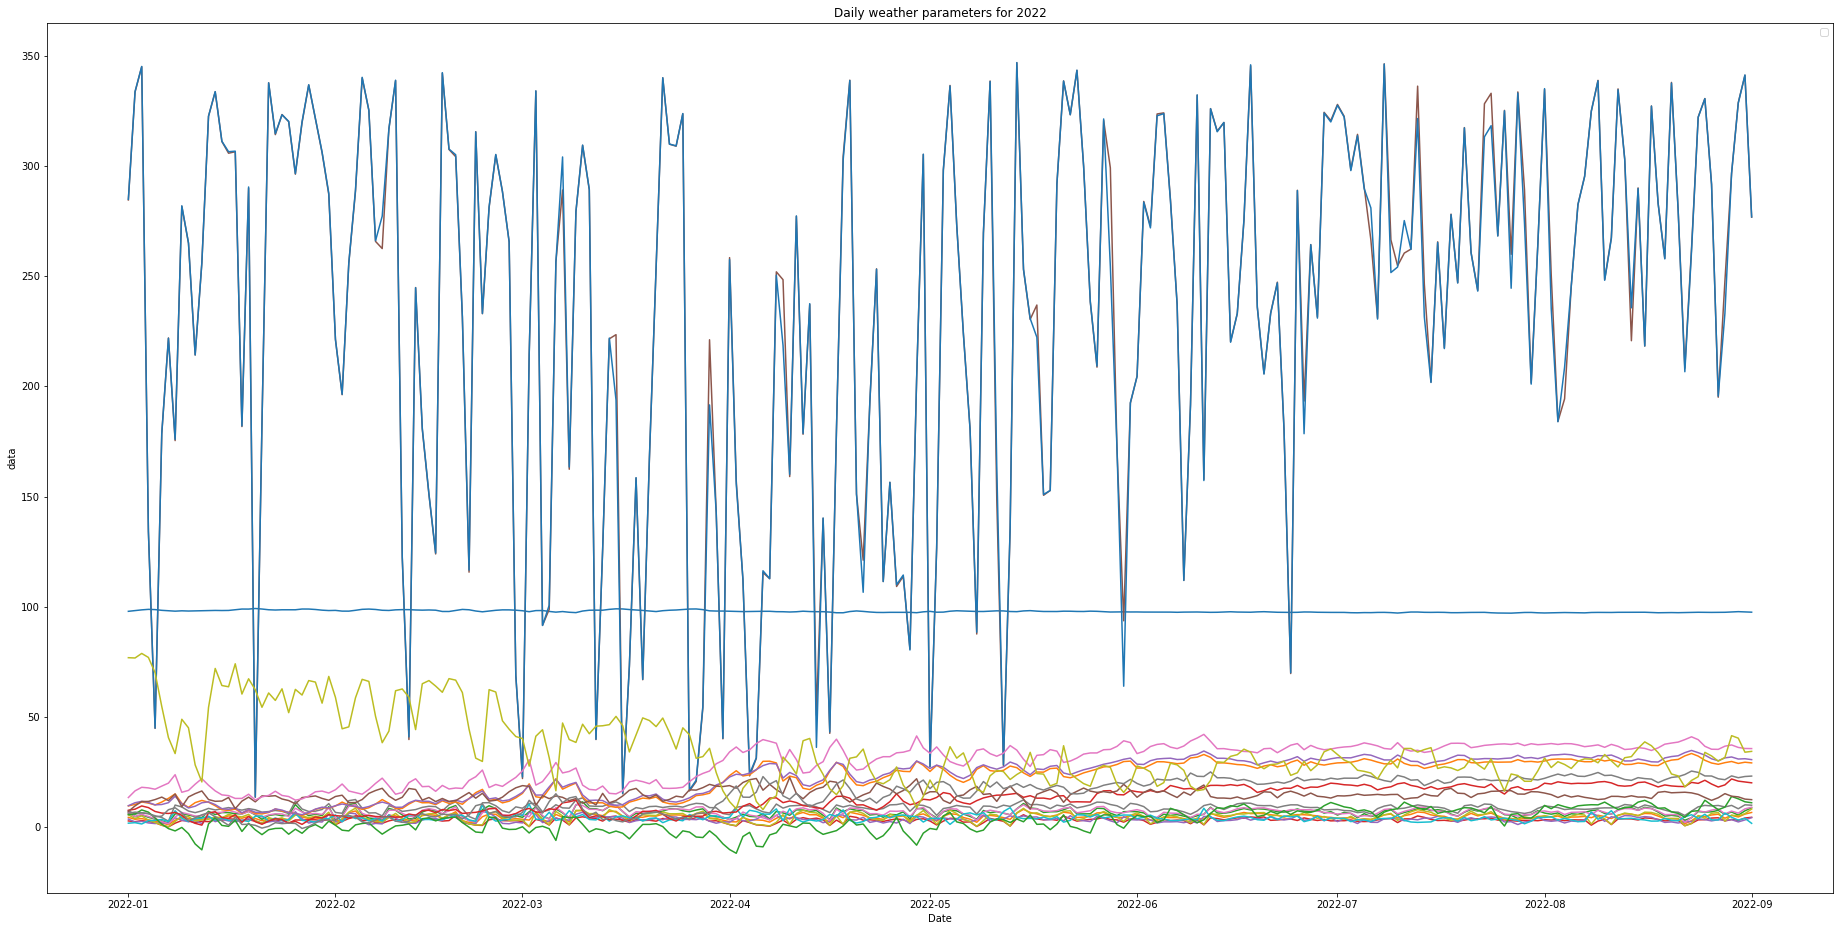

In [ ]:
# Create a time series plot."Data"
plt.figure(figsize = (32,16))

plt.plot(data["2022"])
plt.xlabel("Date")
plt.ylabel("data")
plt.title("Daily weather parameters for 2022")
plt.legend()
plt.show()

In [ ]:
# split the columns into features and target (X ,Y).
features = data[[c for c in data if c not in ["RH2M"]]]
target = pd.DataFrame(data["RH2M"])

In [ ]:
#Explore the features
features.head()

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN
date,,,,,,,,,,,,,,,,,,
1990-01-01,98.00,2.74,3.48,2.20,1.29,110.12,3.90,5.17,2.95,2.23,110.69,13.92,1.54,7.73,12.90,13.58,21.58,8.00
1990-01-02,97.84,3.95,5.38,3.16,2.21,257.62,6.34,7.85,4.21,3.64,257.75,16.01,1.20,8.61,15.39,12.37,23.33,10.96
1990-01-03,97.98,4.71,6.84,3.42,3.41,287.00,7.41,9.43,5.44,3.98,287.38,12.61,6.30,9.45,12.76,12.31,19.23,6.91
1990-01-04,98.36,4.02,6.16,1.82,4.34,303.38,5.88,8.83,2.58,6.25,303.75,11.10,3.58,7.34,10.90,11.63,17.65,6.01
1990-01-05,98.47,1.63,2.12,0.83,1.30,120.31,2.12,3.08,1.15,1.93,120.38,11.48,0.30,5.89,9.97,10.32,17.48,7.16


In [ ]:
#Explore the target
target.head()

,RH2M,normal_RH2M,predicted
date,,,
1990-01-01,47.38,0.530083,0.542082
1990-01-02,38.38,0.413382,0.446430
1990-01-03,67.12,0.786048,0.773363
1990-01-04,63.62,0.740664,0.725512
1990-01-05,47.50,0.531639,0.573282


<h4> - Normalize the target data</h4>

In [ ]:
#target normalization = target - min(target) / max(target) - min(target)
target["normal_RH2M"]=(target.values-target.values.min())/(target.values.max()-target.values.min())
target.head()

,RH2M,normal_RH2M,predicted
date,,,
1990-01-01,47.38,0.566611,0.542082
1990-01-02,38.38,0.458981,0.446430
1990-01-03,67.12,0.802679,0.773363
1990-01-04,63.62,0.760823,0.725512
1990-01-05,47.50,0.568046,0.573282


In [ ]:
target["normal_RH2M"].values

array([0.56661086, 0.4589811 , 0.80267878, ..., 0.48289883, 0.40660129,
       0.41114566])

<h2> Data Preparation for LSTM Model</h2>

In [ ]:
#Scaling the features using minmax scaler
scaler = MinMaxScaler(feature_range = (0, 1))
features_ds = scaler.fit_transform(features)
len(features_ds)

11932

In [ ]:

# Using 75% of data for training, 25% for testing.
TRAIN_SIZE = 0.75

#Spliting Data into training and testing
train_size = int(len(features_ds) * TRAIN_SIZE)
test_size = len(features_ds) - train_size

train_X = features_ds[0:train_size, :]
test_X =features_ds[train_size:len(features_ds), :]
train_Y = target["normal_RH2M"].values[0:train_size]
test_Y = target["normal_RH2M"].values[train_size:len(target["normal_RH2M"].values)]

In [ ]:
# Reshape the input data into appropriate form for Keras.

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data 1 shape:")
print(train_X.shape)

New training data 1 shape:
(8949, 1, 18)


<h3><center>LSTM Model</h3>

In [ ]:
#the model function to avoid dublicated code
def fit_model(train_X, train_Y, window_size = 1):

    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=64,input_shape = (1, window_size)))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss = "mse", optimizer = "adam",metrics=['accuracy'])

    model.fit(train_X,
              train_Y,
              epochs = 50,
              validation_split=0.20,
              shuffle=False,
              verbose=0
              )

    return(model)

<h4> -Train the data by the model </h4>

In [ ]:
# Fit the model 1.
model1 = fit_model(train_X, train_Y, window_size=18)

<h4> - the loss func plot</h4>

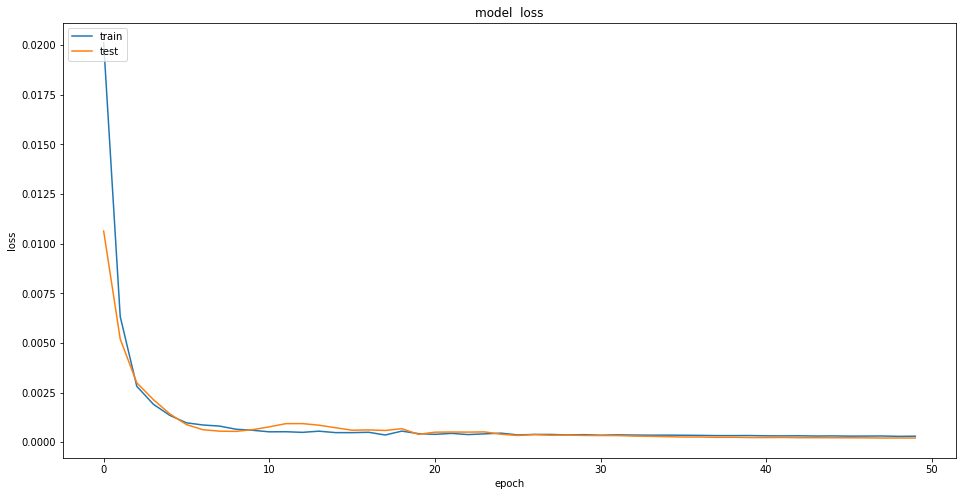

In [ ]:
# summarize history for loss
plt.figure(figsize = (16,8))
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model  loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h3> Test the Data and the preformance of the model</h3>

<h4> - testing </h4>

In [ ]:
train_pred = model1.predict(train_X)
test_pred = model1.predict(test_X)

<h4> - Calculate the error</h4>

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
print("------------------Training Data---------------------")
print("mean_squared_error",mean_squared_error(train_Y,train_pred))
print("mean_absolute_error",mean_absolute_error(train_Y,train_pred))
print("mean_absolute_percentage_error",mean_absolute_percentage_error(train_Y,train_pred))
print("------------------Testing Data---------------------")
print("mean_squared_error :",mean_squared_error(test_Y,test_pred))
print("mean_absolute_error :", mean_absolute_error(test_Y,test_pred))
print("mean_absolute_percentage_error :",mean_absolute_percentage_error(test_Y,test_pred))

------------------Training Data---------------------
mean_squared_error 0.0002022161915940024
mean_absolute_error 0.010766586807055903
mean_absolute_percentage_error 0.026924130513995673
------------------Testing Data---------------------
mean_squared_error : 0.0002550197306599939
mean_absolute_error : 0.011830352242665022
mean_absolute_percentage_error : 0.026863907337063498


<h3>Visualizing the result of prediction</h3>

In [ ]:
target["predicted"] = np.concatenate((train_pred, test_pred), axis=None)

In [ ]:
target.head()

,RH2M,normal_RH2M,predicted
date,,,
1990-01-01,47.38,0.566611,0.548243
1990-01-02,38.38,0.458981,0.464188
1990-01-03,67.12,0.802679,0.799614
1990-01-04,63.62,0.760823,0.730529
1990-01-05,47.50,0.568046,0.569739


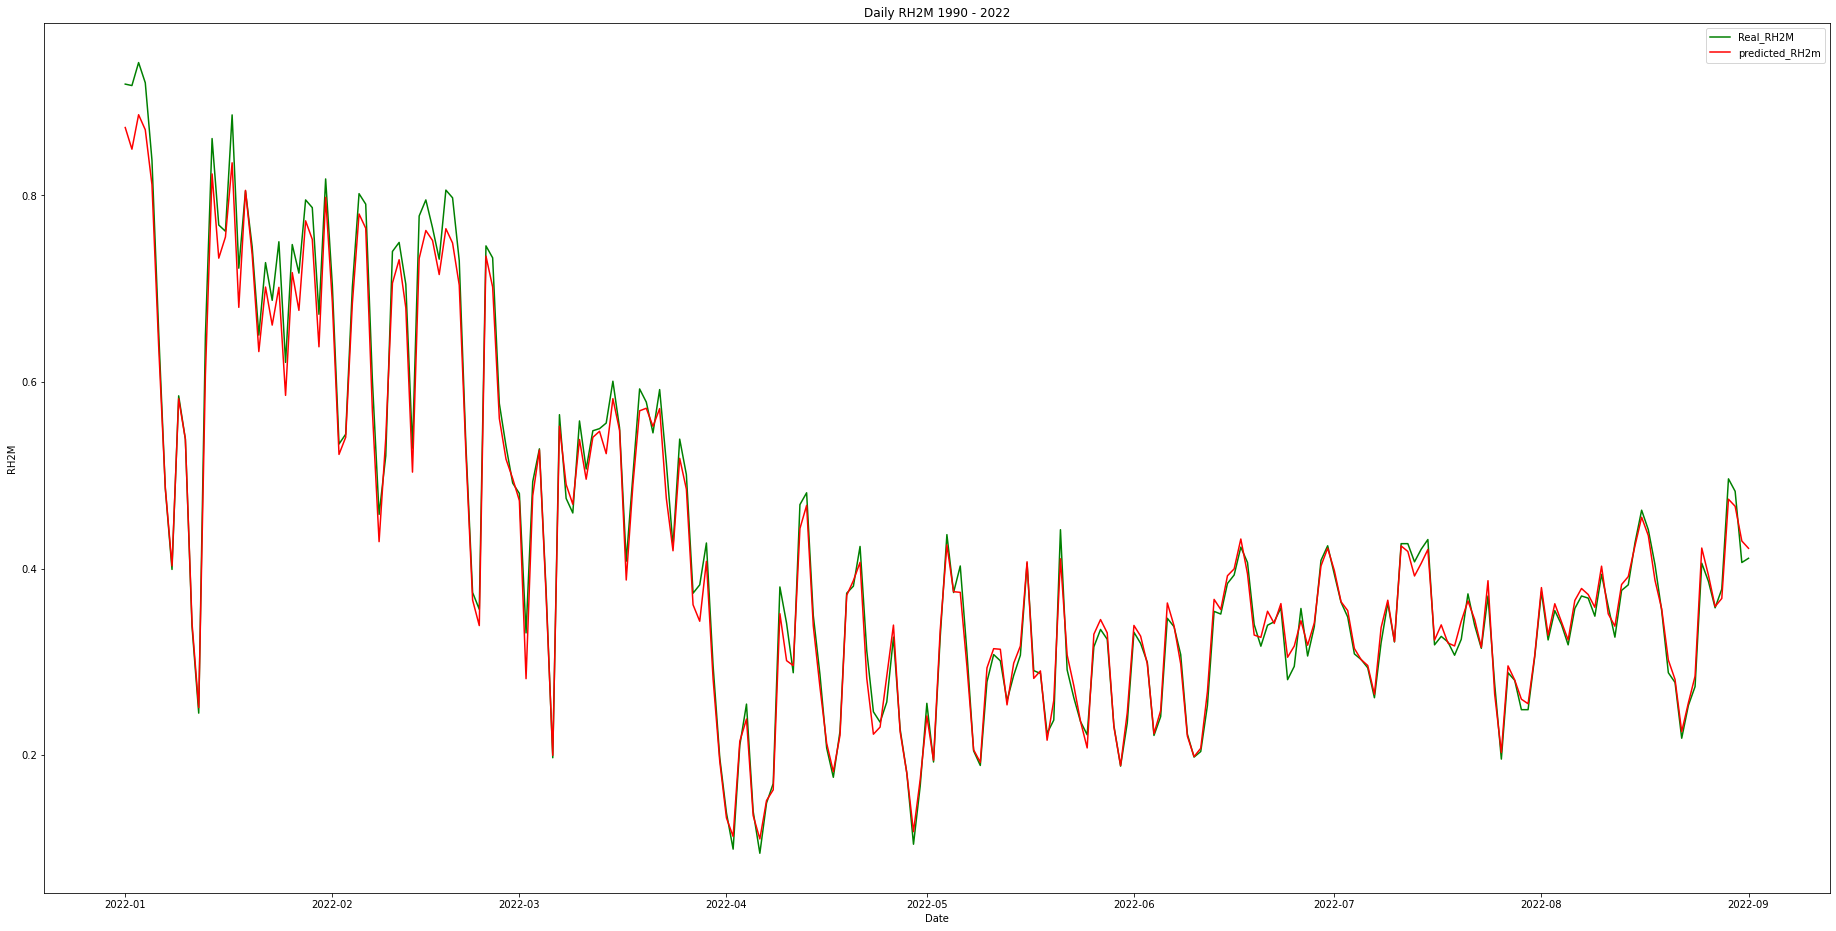

In [ ]:
# Create a time series plot."Dataset-1"
plt.figure(figsize = (32,16))

plt.plot(target["normal_RH2M"]["2022"],'g', label = "Real_RH2M")
plt.plot(target["predicted"]["2022"],'r', label = "predicted_RH2m")

plt.xlabel("Date")
plt.ylabel("RH2M")
plt.title("Daily RH2M 1990 - 2022")
plt.legend()
plt.show()